In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Change specific color in an image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


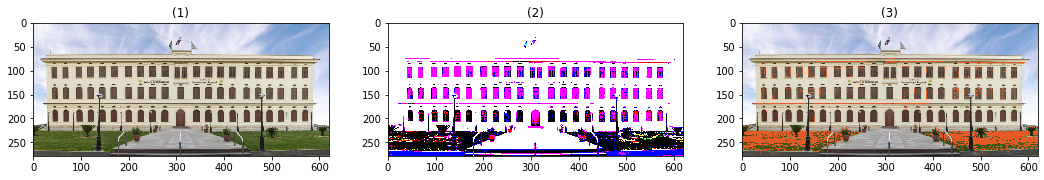

In [2]:
# 1- Get the required RGB color
source_color = (90.0, 111.0, 52.0)
target_color = (230.0, 90.0, 40.0)

# 2- Read image
img = io.imread('./images/cufe.png')

# 3- calculate differences between the image and the required pixel value
diff_mat = img - source_color

# 4- calculate overall distance from the given RGB color 
distance = np.linalg.norm(diff_mat, axis=2)

# 5- create a mask by thresholding the differences
threshold = 33.5
edited_img = np.copy(img)
edited_img[distance < threshold] = target_color

# 6- show the image
show_images([img, diff_mat, edited_img])

## Adaptive thresholding

In [3]:
def get_threshold_from_histogram(hist):
    """
    Calculate the threshold value from the histogram
    """
    threshold = 0
    pixels = 0

    for i in range(len(hist)):
        threshold += hist[i] * i
        pixels += hist[i]
        
    return threshold / pixels

In [4]:
def get_threshold(image):
    """
    Return a threshold value calculated from the image histogram
    """
    
    hist = histogram(image, nbins=256, source_range='dtype')[0]
    
    init_threshold = get_threshold_from_histogram(hist)
    init_threshold = int(init_threshold)
    
    lower_threshold = get_threshold_from_histogram(hist[:init_threshold])
    upper_threshold = get_threshold_from_histogram(hist[init_threshold:])

    threshold = (lower_threshold + upper_threshold) / 2
    
    return threshold
    

In [5]:
def apply_threshold(image, threshold):
    binary_img = np.zeros(image.shape) * 255
    binary_img[image >= threshold] = 1
    return binary_img 

In [6]:
def apply_adaptive_thresholding(img):
    threshold = get_threshold(img)
    binary_img = apply_threshold(img, threshold)
    return binary_img

In [7]:
def read_grayscale_img(path):
    img = io.imread(path, as_gray=True)
    img = img.astype('uint8')
    return img

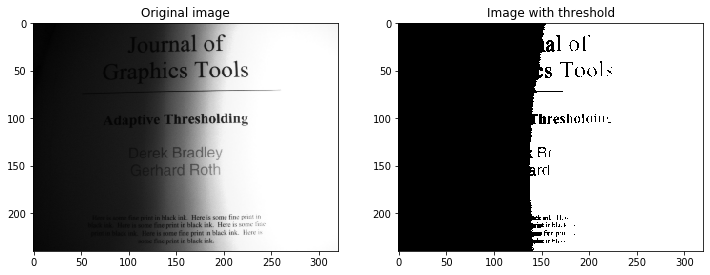

In [8]:
book_img = read_grayscale_img("./images/book.png")
book_binary_img = apply_adaptive_thresholding(book_img)

show_images([book_img, book_binary_img],
            ['Original image', 'Image with threshold'])

## Local adaptive thresholding

In [9]:
def apply_local_adaptive_thresholding(img):
    y_mid = img.shape[0] // 2
    x_mid = img.shape[1] // 2
    
    binary_img = np.zeros(img.shape)
    
    binary_img[0: y_mid, 0: x_mid] = apply_adaptive_thresholding(img[0: y_mid, 0: x_mid])
    binary_img[y_mid:, 0: x_mid] = apply_adaptive_thresholding(img[y_mid:, 0: x_mid])
    binary_img[0: y_mid, x_mid:] = apply_adaptive_thresholding(img[0: y_mid, x_mid:])
    binary_img[y_mid:, x_mid:] = apply_adaptive_thresholding(img[y_mid:, x_mid:])
    
    return binary_img
    

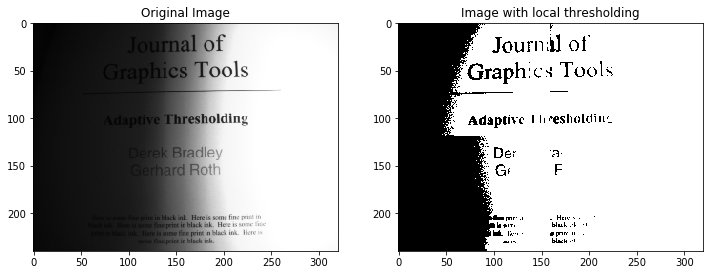

In [10]:
book_img = read_grayscale_img("./images/book.png")
book_binary_img = apply_local_adaptive_thresholding(book_img)
show_images([book_img, book_binary_img], ['Original Image', 'Image with local thresholding'])